# Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets

In [ ]:
raisin_dataset = pd.read_excel('/content/drive/MyDrive/CS 412 Project/Raisin_Dataset.xlsx')

In [ ]:
print(raisin_dataset.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


# Distance computations

In [ ]:
def euclidean_distance(X_test, X_train): # ∑ipi^2+∑ipi^2-2∑ipiqi
  return np.add(np.sum(X_test ** 2, axis=1, keepdims=True), np.sum(X_train ** 2, axis=1, keepdims=True).T) - 2* X_test @ X_train.T

In [ ]:
def manhattan_distance(X_test, X_train): # ∑i∣pi−qi∣
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    return np.sum(np.abs(X_test[:, np.newaxis, :] - X_train), axis=2)

In [ ]:
def chebyshev_distance(X_test, X_train): # max{∣p0−q0∣,∣p1−q1∣,...,∣pi−qi∣}
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    return np.max(np.abs(X_test[:, None] - X_train), axis=2)

In [ ]:
X_train = np.array([[1, 2], [0, 3], [-1, 1], [4, 3], [5, 2], [-2, 0], [1, 7], [2, 4]])
X_test = np.array([[-1, 0], [2, 1]])

eud = euclidean_distance(X_test, X_train)
print("Euclidean Distance:\n", eud)
mad = manhattan_distance(X_test, X_train)
print("Manhattan Distance:\n", mad)
chd = chebyshev_distance(X_test, X_train)
print("Chebyshev Distance:\n", chd)
#TODO: Validate calculations by hand

Euclidean Distance:
 [[ 8 10  1 34 40  1 53 25]
 [ 2  8  9  8 10 17 37  9]]
Manhattan Distance:
 [[4 4 1 8 8 1 9 7]
 [2 4 3 4 4 5 7 3]]
Chebyshev Distance:
 [[2 3 1 5 6 1 7 4]
 [1 2 3 2 3 4 6 3]]


# Identify k-nearest neighbors

In [ ]:
# Unweighted KNN
def k_neighbors(dists, Y_train, k):
  """
  Inputs:
  - dists: distance matrix of shape (num_test, num_train)
  - Y_train: ground truth labels for training data of shape (num_train)
  - k: number of nearest neighbors
  Output:
  - neighbors: array of shape (num_test, k) where each row contains the labels of the k nearest neighbors for each test example
  """
  num_test, num_train = dists.shape
  neighbors = np.zeros((num_test, k))
  for i in range(num_test):
    idx = np.argsort(dists[i])
    neighbors[i] = Y_train[idx[:k]]
  return neighbors

Y_train = np.array([0, 1, 1, 0, 1, 1, 0, 1])
eu_neighbors = k_neighbors(eud, Y_train, 3)
print("Euclidean Neighbors:\n", eu_neighbors)
ma_neighbors = k_neighbors(mad, Y_train, 3)
print("Manhattan Neighbors:\n", ma_neighbors)
ch_neighbors = k_neighbors(chd, Y_train, 3)
print("Chebyshev Neighbors:\n", ch_neighbors)

Euclidean Neighbors:
 [[1. 1. 0.]
 [0. 1. 0.]]
Manhattan Neighbors:
 [[1. 1. 0.]
 [0. 1. 1.]]
Chebyshev Neighbors:
 [[1. 1. 0.]
 [0. 1. 0.]]


In [ ]:
# Inverse Distance Weighted KNN
def k_neighbors_2(dists, Y_train, k):
  """
  Inputs:
  - dists: distance matrix of shape (num_test, num_train)
  - Y_train: ground truth labels for training data of shape (num_train)
  - k: number of nearest neighbors
  Output:
  - neighbors: array of shape (num_test, k) where each row contains the labels of the k nearest neighbors for each test example
  """
  num_test, num_train = dists.shape
  neighbors = np.zeros((num_test, k))
  distances = np.zeros((num_test, k))
  for i in range(num_test):
    idx = np.argsort(dists[i])
    neighbors[i] = Y_train[idx[:k]]
    distances[i] = dists[i, idx[:k]]
  return neighbors, distances

Y_train = np.array([0, 1, 1, 0, 1, 1, 0, 1])
eu_neighbors = k_neighbors_2(eud, Y_train, 3)
print("Euclidean Neighbors:\n", eu_neighbors[0])
print(eu_neighbors[1])
ma_neighbors = k_neighbors_2(mad, Y_train, 3)
print("Manhattan Neighbors:\n", ma_neighbors[0])
print(ma_neighbors[1])
ch_neighbors = k_neighbors_2(chd, Y_train, 3)
print("Chebyshev Neighbors:\n", ch_neighbors[0])
print(ch_neighbors[1])

Euclidean Neighbors:
 [[1. 1. 0.]
 [0. 1. 0.]]
[[1. 1. 8.]
 [2. 8. 8.]]
Manhattan Neighbors:
 [[1. 1. 0.]
 [0. 1. 1.]]
[[1. 1. 4.]
 [2. 3. 3.]]
Chebyshev Neighbors:
 [[1. 1. 0.]
 [0. 1. 0.]]
[[1. 1. 2.]
 [1. 2. 2.]]


In [ ]:
# Class Balanced Weighted KNN
def k_neighbors_3(dists, Y_train, k):
  """
  Inputs:
  - dists: distance matrix of shape (num_test, num_train)
  - Y_train: ground truth labels for training data of shape (num_train)
  - k: number of nearest neighbors
  Output:
  - neighbors: array of shape (num_test, k) where each row contains the labels of the k nearest neighbors for each test example
  """
  classes = list(set(Y_train))
  num_test, num_train = dists.shape
  distances = np.zeros((len(classes), num_test, k))
  for c in classes:
    # Find the indices of training points belonging to the current class
    class_indices = np.where(Y_train == c)[0]
    # Calculate distances for the current class
    class_dists = dists[:, class_indices]
    # Sort the distances for each test point and keep the first k values
    sorted_indices = np.argsort(class_dists, axis=1)
    k_nearest_indices = sorted_indices[:, :k]
    # Update the k_distance matrix for the current class
    distances[c, :, :] = class_dists[np.arange(num_test)[:, None], k_nearest_indices]
  return classes, distances

Y_train = np.array([0, 1, 1, 0, 1, 1, 0, 1])
classes, eu_distances = k_neighbors_3(eud, Y_train, 3)
print("Classes:", classes)
print(eu_distances)
classes, ma_distances = k_neighbors_3(mad, Y_train, 3)
print("Classes:", classes)
print(ma_distances)
classes, ch_distances = k_neighbors_3(chd, Y_train, 3)
print("Classes:", classes)
print(ch_distances)

Classes: [0, 1]
[[[ 8. 34. 53.]
  [ 2.  8. 37.]]

 [[ 1.  1. 10.]
  [ 8.  9.  9.]]]
Classes: [0, 1]
[[[4. 8. 9.]
  [2. 4. 7.]]

 [[1. 1. 4.]
  [3. 3. 4.]]]
Classes: [0, 1]
[[[2. 5. 7.]
  [1. 2. 6.]]

 [[1. 1. 3.]
  [2. 3. 3.]]]


# Predict using k-nearest neighbors

In [ ]:
def knn_predict(X_test, X_train, Y_train, k):
  Y_pred_eu = np.zeros(X_test.shape[0], dtype=int)
  Y_pred_ma = np.zeros(X_test.shape[0], dtype=int)
  Y_pred_ch = np.zeros(X_test.shape[0], dtype=int)
  neighbors_eu = k_neighbors(euclidean_distance(X_test, X_train), Y_train, k)
  neighbors_ma = k_neighbors(manhattan_distance(X_test, X_train), Y_train, k)
  neighbors_ch = k_neighbors(chebyshev_distance(X_test, X_train), Y_train, k)
  for i in range(X_test.shape[0]):
    classes, counts = np.unique(neighbors_eu[i], return_counts=True)
    Y_pred_eu[i] = classes[np.argmax(counts)]
    classes, counts = np.unique(neighbors_ma[i], return_counts=True)
    Y_pred_ma[i] = classes[np.argmax(counts)]
    classes, counts = np.unique(neighbors_ch[i], return_counts=True)
    Y_pred_ch[i] = classes[np.argmax(counts)]
  return Y_pred_eu, Y_pred_ma, Y_pred_ch

Y_pred_eu, Y_pred_ma, Y_pred_ch = knn_predict(X_test, X_train, Y_train, 3)
print(Y_pred_eu, Y_pred_ma, Y_pred_ch)

[1 0] [1 1] [1 0]


In [ ]:
def knn_predict_2(X_test, X_train, Y_train, k):
  Y_pred_eu = np.zeros(X_test.shape[0], dtype=int)
  Y_pred_ma = np.zeros(X_test.shape[0], dtype=int)
  Y_pred_ch = np.zeros(X_test.shape[0], dtype=int)
  neighbors_eu, dists_eu = k_neighbors_2(euclidean_distance(X_test, X_train), Y_train, k)
  neighbors_ma, dists_ma = k_neighbors_2(manhattan_distance(X_test, X_train), Y_train, k)
  neighbors_ch, dists_ch = k_neighbors_2(chebyshev_distance(X_test, X_train), Y_train, k)
  for i in range(X_test.shape[0]):
    classes = np.unique(neighbors_eu[i])
    counts = np.zeros(len(classes))
    inverse_dists_eu = 1 / dists_eu[i]
    for j in range(len(classes)):
      counts[j] = np.sum(inverse_dists_eu[neighbors_eu[i] == classes[j]])
    Y_pred_eu[i] = classes[np.argmax(counts)]

    classes = np.unique(neighbors_ma[i])
    counts = np.zeros(len(classes))
    inverse_dists_ma = 1 / dists_ma[i]
    for j in range(len(classes)):
      counts[j] = np.sum(inverse_dists_ma[neighbors_ma[i] == classes[j]])
    Y_pred_ma[i] = classes[np.argmax(counts)]

    classes = np.unique(neighbors_ch[i])
    counts = np.zeros(len(classes))
    inverse_dists_ch = 1 / dists_ch[i]
    for j in range(len(classes)):
      counts[j] = np.sum(inverse_dists_ch[neighbors_ch[i] == classes[j]])
    Y_pred_ch[i] = classes[np.argmax(counts)]
  return Y_pred_eu, Y_pred_ma, Y_pred_ch

Y_pred_eu, Y_pred_ma, Y_pred_ch = knn_predict_2(X_test, X_train, Y_train, 3)
print(Y_pred_eu, Y_pred_ma, Y_pred_ch)

[1 0] [1 1] [1 0]


In [ ]:
def knn_predict_3(X_test, X_train, Y_train, k):
  Y_pred_eu = np.zeros(X_test.shape[0], dtype=int)
  Y_pred_ma = np.zeros(X_test.shape[0], dtype=int)
  Y_pred_ch = np.zeros(X_test.shape[0], dtype=int)
  classes, dists_eu = k_neighbors_3(euclidean_distance(X_test, X_train), Y_train, k)
  classes, dists_ma = k_neighbors_3(manhattan_distance(X_test, X_train), Y_train, k)
  classes, dists_ch = k_neighbors_3(chebyshev_distance(X_test, X_train), Y_train, k)
  inverse_dists_eu = 1/dists_eu
  inverse_dists_ma = 1/dists_ma
  inverse_dists_ch = 1/dists_ch
  for i in range(X_test.shape[0]):
    counts = np.zeros(len(classes))
    for j in range(len(classes)):
      counts[j] = np.sum(inverse_dists_eu[j][i])
    Y_pred_eu[i] = classes[np.argmax(counts)]

    counts = np.zeros(len(classes))
    for j in range(len(classes)):
      counts[j] = np.sum(inverse_dists_ma[j][i])
    Y_pred_ma[i] = classes[np.argmax(counts)]

    counts = np.zeros(len(classes))
    for j in range(len(classes)):
      counts[j] = np.sum(inverse_dists_ch[j][i])
    Y_pred_ch[i] = classes[np.argmax(counts)]
  return Y_pred_eu, Y_pred_ma, Y_pred_ch

Y_pred_eu, Y_pred_ma, Y_pred_ch = knn_predict_3(X_test, X_train, Y_train, 3)
print(Y_pred_eu, Y_pred_ma, Y_pred_ch)

[1 0] [1 1] [1 0]


# Test performance

In [ ]:
def compute_error_rate(ypred, ytrue):
  error_rate = (np.mean(ypred != ytrue)) * 100
  return error_rate

In [ ]:
dataset = raisin_dataset.to_numpy()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataset[:, :-1], dataset[:, -1], test_size=0.2, random_state=42)
label_encoder.fit(Ytrain)
Ytrain = label_encoder.transform(Ytrain)

label_encoder.fit(Ytest)
Ytest = label_encoder.transform(Ytest)

k_values = [1, 3, 5, 7, 9, 11, 13, 15]

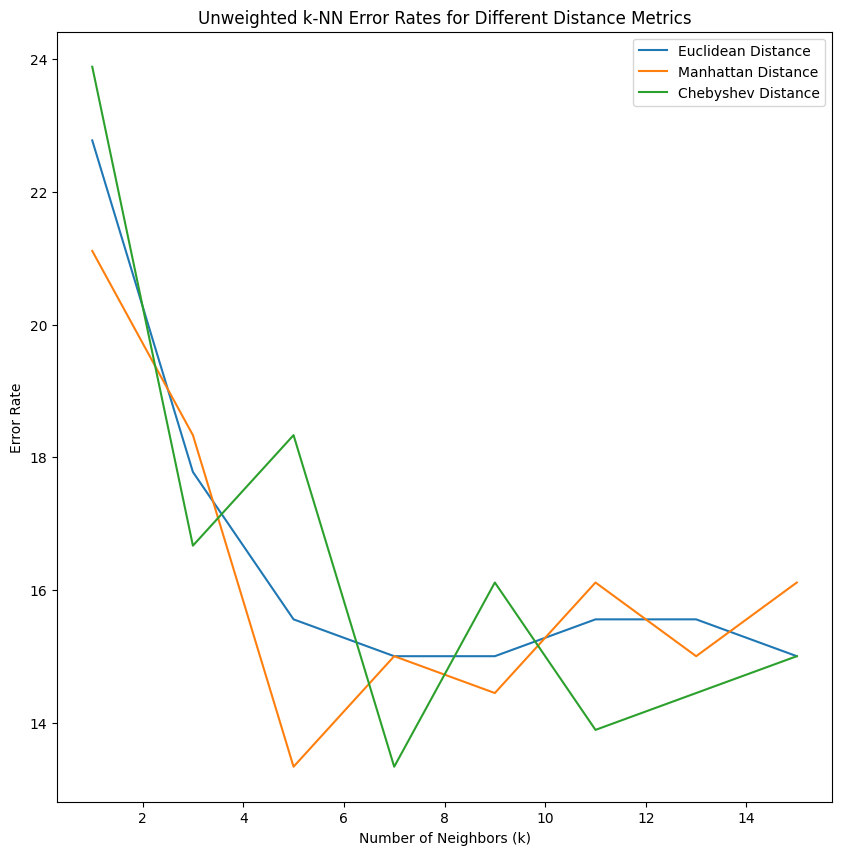

In [ ]:
error_rates_euclidean = []
error_rates_manhattan = []
error_rates_chebyshev = []
for k in k_values:
    Y_pred_eu, Y_pred_ma, Y_pred_ch = knn_predict(Xtest, Xtrain, Ytrain, k)
    error_rates_euclidean.append(compute_error_rate(Y_pred_eu, Ytest))
    error_rates_manhattan.append(compute_error_rate(Y_pred_ma, Ytest))
    error_rates_chebyshev.append(compute_error_rate(Y_pred_ch, Ytest))

plt.figure(figsize=(10, 10))
plt.plot(k_values, error_rates_euclidean, label='Euclidean Distance')
plt.plot(k_values, error_rates_manhattan, label='Manhattan Distance')
plt.plot(k_values, error_rates_chebyshev, label='Chebyshev Distance')
plt.title('Unweighted k-NN Error Rates for Different Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.legend()

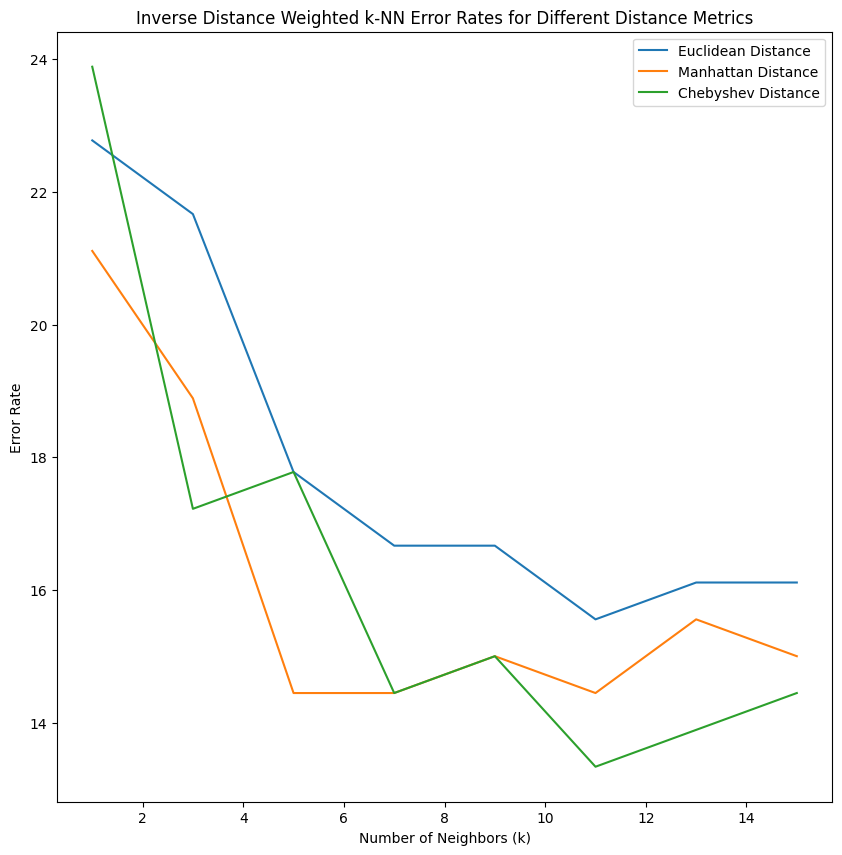

In [ ]:
error_rates_euclidean = []
error_rates_manhattan = []
error_rates_chebyshev = []
for k in k_values:
    Y_pred_eu, Y_pred_ma, Y_pred_ch = knn_predict_2(Xtest, Xtrain, Ytrain, k)
    error_rates_euclidean.append(compute_error_rate(Y_pred_eu, Ytest))
    error_rates_manhattan.append(compute_error_rate(Y_pred_ma, Ytest))
    error_rates_chebyshev.append(compute_error_rate(Y_pred_ch, Ytest))

plt.figure(figsize=(10, 10))
plt.plot(k_values, error_rates_euclidean, label='Euclidean Distance')
plt.plot(k_values, error_rates_manhattan, label='Manhattan Distance')
plt.plot(k_values, error_rates_chebyshev, label='Chebyshev Distance')
plt.title('Inverse Distance Weighted k-NN Error Rates for Different Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.legend()

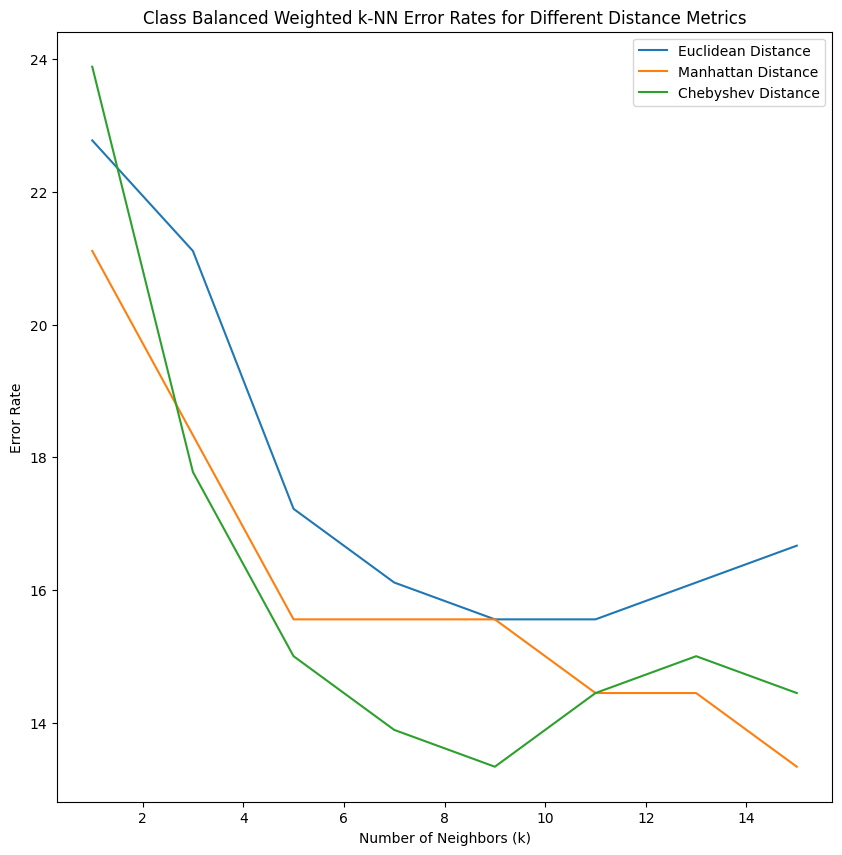

In [ ]:
error_rates_euclidean = []
error_rates_manhattan = []
error_rates_chebyshev = []
for k in k_values:
    Y_pred_eu, Y_pred_ma, Y_pred_ch = knn_predict_3(Xtest, Xtrain, Ytrain, k)
    error_rates_euclidean.append(compute_error_rate(Y_pred_eu, Ytest))
    error_rates_manhattan.append(compute_error_rate(Y_pred_ma, Ytest))
    error_rates_chebyshev.append(compute_error_rate(Y_pred_ch, Ytest))

plt.figure(figsize=(10, 10))
plt.plot(k_values, error_rates_euclidean, label='Euclidean Distance')
plt.plot(k_values, error_rates_manhattan, label='Manhattan Distance')
plt.plot(k_values, error_rates_chebyshev, label='Chebyshev Distance')
plt.title('Class Balanced Weighted k-NN Error Rates for Different Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.legend()